In [2]:
import pandas as pd
import matplotlib as cm
from datascience import *
import numpy as np
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
Data= Table .read_table("nc-est2015-agesex-res.csv")
Data


SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
0,5,4056858,4056872,4064653,4087709,4132242,4123626,4006900,4018158
0,6,4066381,4066412,4073013,4074993,4097605,4142916,4135930,4019207
0,7,4030579,4030594,4043046,4083225,4084913,4108349,4155326,4148360
0,8,4046486,4046497,4025604,4053203,4093177,4095711,4120903,4167887
0,9,4148353,4148369,4125415,4035710,4063152,4104072,4108349,4133564


In [4]:

table1_selected=Data.select(0,1,2,9)
table2010=table1_selected.relabeled(2,'2010')

table2015=table2010.relabeled(3,'2015')
table2015

SEX,AGE,2010,2015
0,0,3944153,3978038
0,1,3978070,3968564
0,2,4096929,3966583
0,3,4119040,3974061
0,4,4063170,4020035
0,5,4056858,4018158
0,6,4066381,4019207
0,7,4030579,4148360
0,8,4046486,4167887
0,9,4148353,4133564


In [5]:
growth_rate=table2015.column('2010')/ table2015.column('2015')**(1/4)-1

a = table2015.with_column("Growth rate",growth_rate)

a1=a.where('SEX',are.between(1,3))
a2=a1.where('AGE',are.between(0,101))

a2

SEX,AGE,2010,2015,Growth rate
1,0,2014276,2035134,53328.9
1,1,2030853,2029295,53806.4
1,2,2092198,2026604,55450.2
1,3,2104550,2030644,55749.8
1,4,2077550,2055924,54864.5
1,5,2072094,2050848,54754.3
1,6,2075319,2050663,54840.7
1,7,2057076,2117118,53927
1,8,2065453,2128825,54072
1,9,2119696,2111678,55604.4


In [6]:
a2.sort('Growth rate',descending=True)

SEX,AGE,2010,2015,Growth rate
2,49,2341230,2099680,61503.3
2,50,2359941,2227286,61087.2
1,19,2341984,2184392,60917.8
2,48,2301062,2062616,60717.9
2,47,2297017,2054083,60674
1,18,2305473,2156041,60164.3
2,46,2288779,2095675,60154.2
1,50,2300354,2173002,59913.2
1,49,2264671,2052872,59828.4
1,20,2308319,2240373,59663.5


In [12]:

men = a2.where("SEX", 1).where("AGE",are.between(0,100))
Men=men.drop('SEX',2)
Men
m1=Men.relabeled(1,'Men')
m1

AGE,Men,Growth rate
0,2035134,53328.9
1,2029295,53806.4
2,2026604,55450.2
3,2030644,55749.8
4,2055924,54864.5
5,2050848,54754.3
6,2050663,54840.7
7,2117118,53927
8,2128825,54072
9,2111678,55604.4


In [11]:
women= a2.where("SEX", 2).where("AGE",are.between(0,100))
Women=women.drop('SEX','2010')
Women
w1=Women.relabeled(1,'Women')
w1

AGE,Women,Growth rate
0,1942904,51690.2
1,1939269,52179.1
2,1939979,53715.4
3,1943417,53953
4,1964111,53039.1
5,1967310,52994.7
6,1968544,53154.5
7,2031242,52274.4
8,2039062,52423.5
9,2021886,53797.4


In [18]:
b=m1.select('Men')
b
a = w1.with_columns(b)
a

AGE,Women,Growth rate,Men
0,1942904,51690.2,2035134
1,1939269,52179.1,2029295
2,1939979,53715.4,2026604
3,1943417,53953,2030644
4,1964111,53039.1,2055924
5,1967310,52994.7,2050848
6,1968544,53154.5,2050663
7,2031242,52274.4,2117118
8,2039062,52423.5,2128825
9,2021886,53797.4,2111678


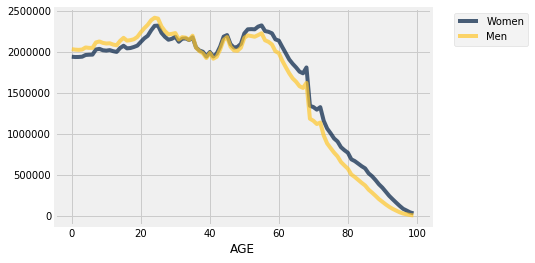

In [20]:
a.select(0,1,3).plot(0)